In [50]:
import os
import cv2
import numpy as np
import matplotlib
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout




print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("OpenCV version:", cv2.__version__)
print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)


NumPy version: 2.0.2
Matplotlib version: 3.9.4
OpenCV version: 4.11.0
scikit-learn version: 1.6.1
TensorFlow version: 2.19.0


In [51]:
img_size = 32  
data = "./train"  


In [52]:
def load_images_from_folder(folder_path):
    X, y = [], []
    label_map = {}
    label_num = 0

    for label_folder in sorted(os.listdir(folder_path)):
        path = os.path.join(folder_path, label_folder)
        if not os.path.isdir(path):
            continue
        
        if label_folder not in label_map:
            label_map[label_folder] = label_num
            label_num += 1
        
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))       
                X.append(img)
                y.append(label_map[label_folder])
            except:
                print("Error loading:", img_path)

    return np.array(X), np.array(y), label_map


In [53]:
X, y, label_map = load_images_from_folder(DATASET_PATH)


X = X.reshape(-1, img_size, img_size, 1) / 255.0
y = to_categorical(y)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Number of classes:", len(label_map))


X_train shape: (62560, 32, 32, 1)
y_train shape: (62560, 46)
Number of classes: 46


In [54]:

model = Sequential([
    Input(shape=(32, 32, 1)),  

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,790 (1.22 MB)

 Trainable params: 319,790 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)


Epoch 1/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.4695 - loss: 1.9628 - val_accuracy: 0.9175 - val_loss: 0.2846
Epoch 2/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8325 - loss: 0.5409 - val_accuracy: 0.9487 - val_loss: 0.1798
Epoch 3/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8821 - loss: 0.3769 - val_accuracy: 0.9594 - val_loss: 0.1352
Epoch 4/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9074 - loss: 0.2945 - val_accuracy: 0.9687 - val_loss: 0.1080
Epoch 5/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9236 - loss: 0.2422 - val_accuracy: 0.9715 - val_loss: 0.0976
Epoch 6/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9373 - loss: 0.1985 - val_accuracy: 0.9747 - val_loss: 0.0876
Epoch 7/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9430 - loss: 0.1763 - val_accuracy: 0.9735 - val_loss: 0.0892
Epoch 8/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9512 - loss: 0.1524 - 

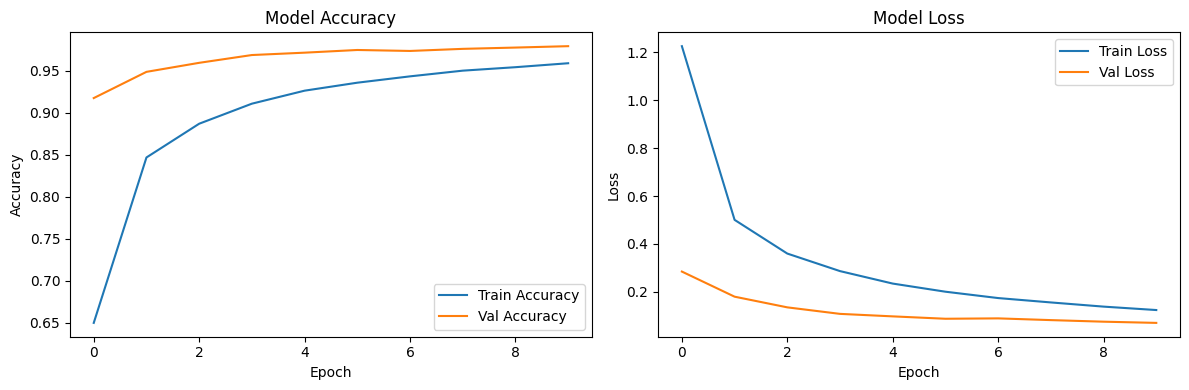

In [56]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


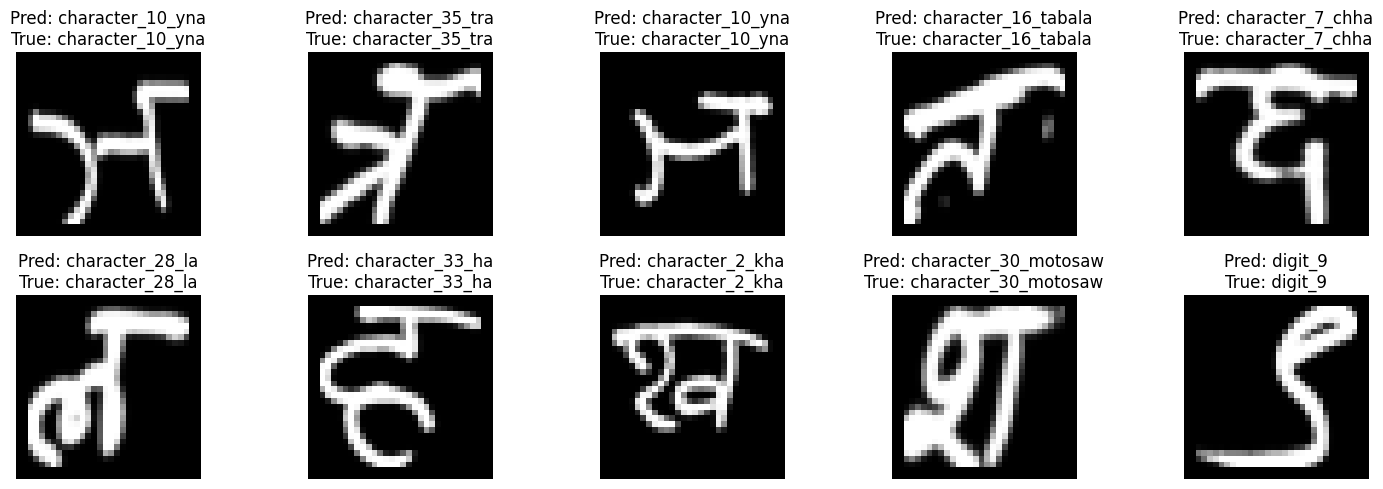

In [57]:

label_map_rev = {v: k for k, v in label_map.items()}


predictions = model.predict(X_val[:10])
predicted_classes = predictions.argmax(axis=1)
true_classes = y_val[:10].argmax(axis=1)


plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_val[i].reshape(32, 32), cmap='gray')
    plt.title(f"Pred: {label_map_rev[predicted_classes[i]]}\nTrue: {label_map_rev[true_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



In [62]:
print("YAAAAAAA BAN GYA 😁😁😁😁😁😁😁😁😁😁😁😁😁😁 YES YES YESSSSSS")

YAAAAAAA BAN GYA 😁😁😁😁😁😁😁😁😁😁😁😁😁😁 YES YES YESSSSSS


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


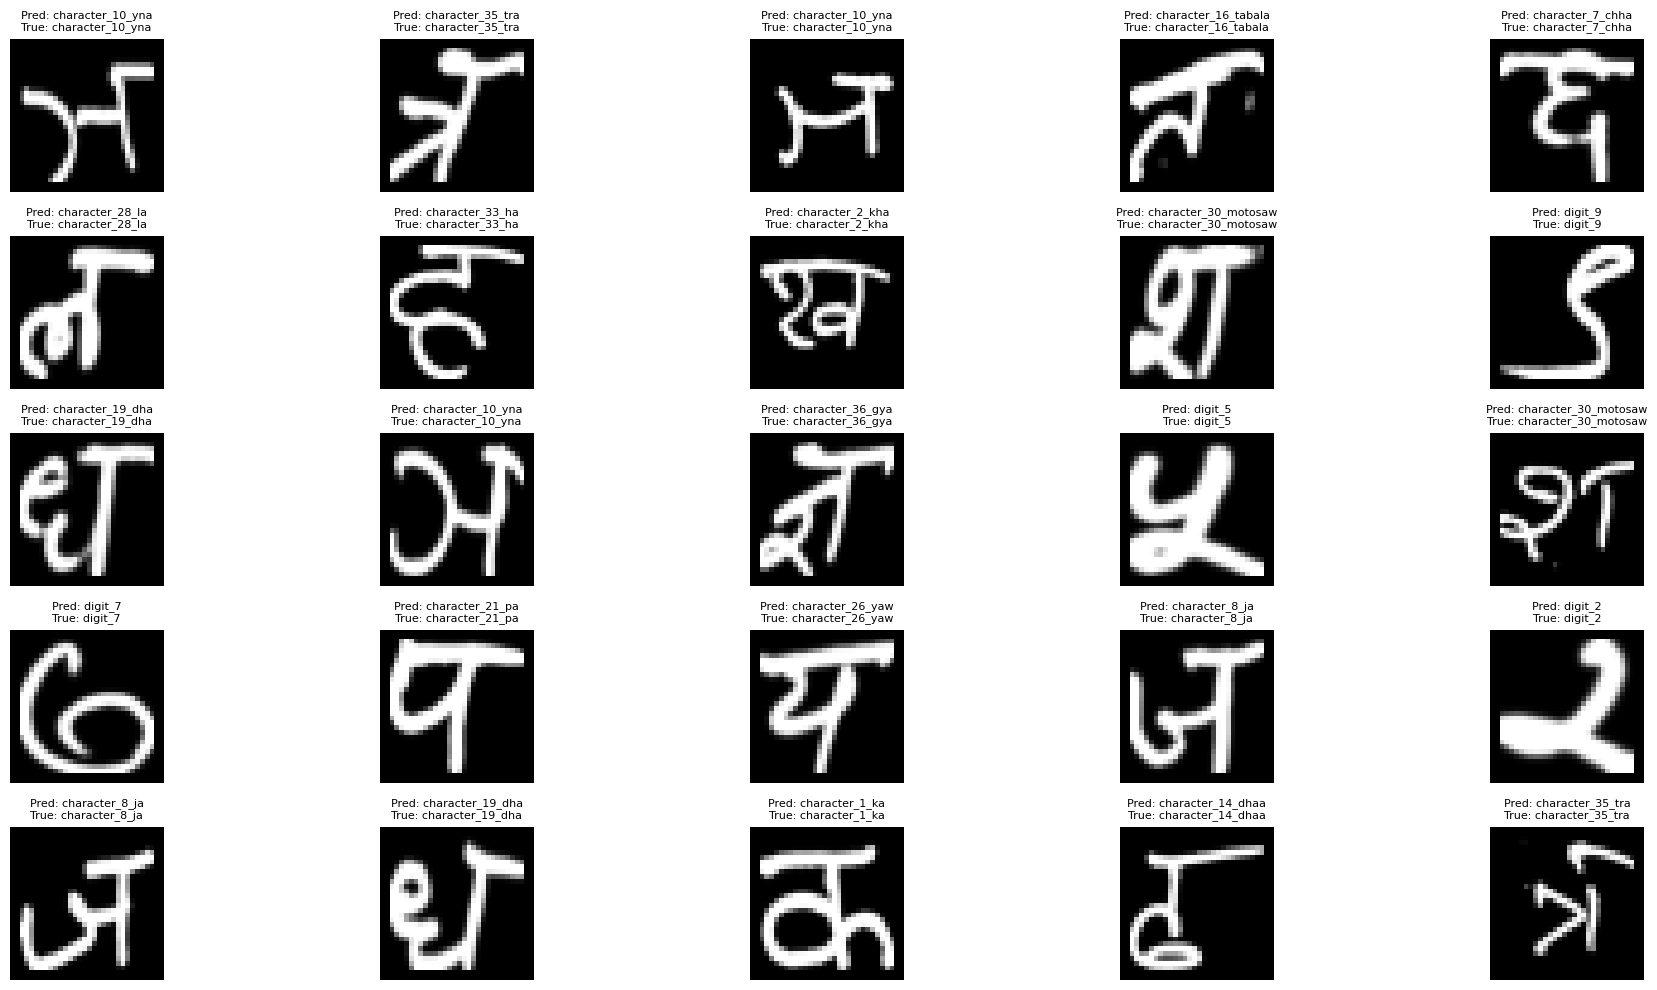

In [64]:

num_images = 25  


predictions = model.predict(X_val[:num_images])
predicted_classes = predictions.argmax(axis=1)
true_classes = y_val[:num_images].argmax(axis=1)


plt.figure(figsize=(20, 10))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)  
    plt.imshow(X_val[i].reshape(32, 32), cmap='gray')  

    plt.title(f"Pred: {label_map_rev[predicted_classes[i]]}\nTrue: {label_map_rev[true_classes[i]]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


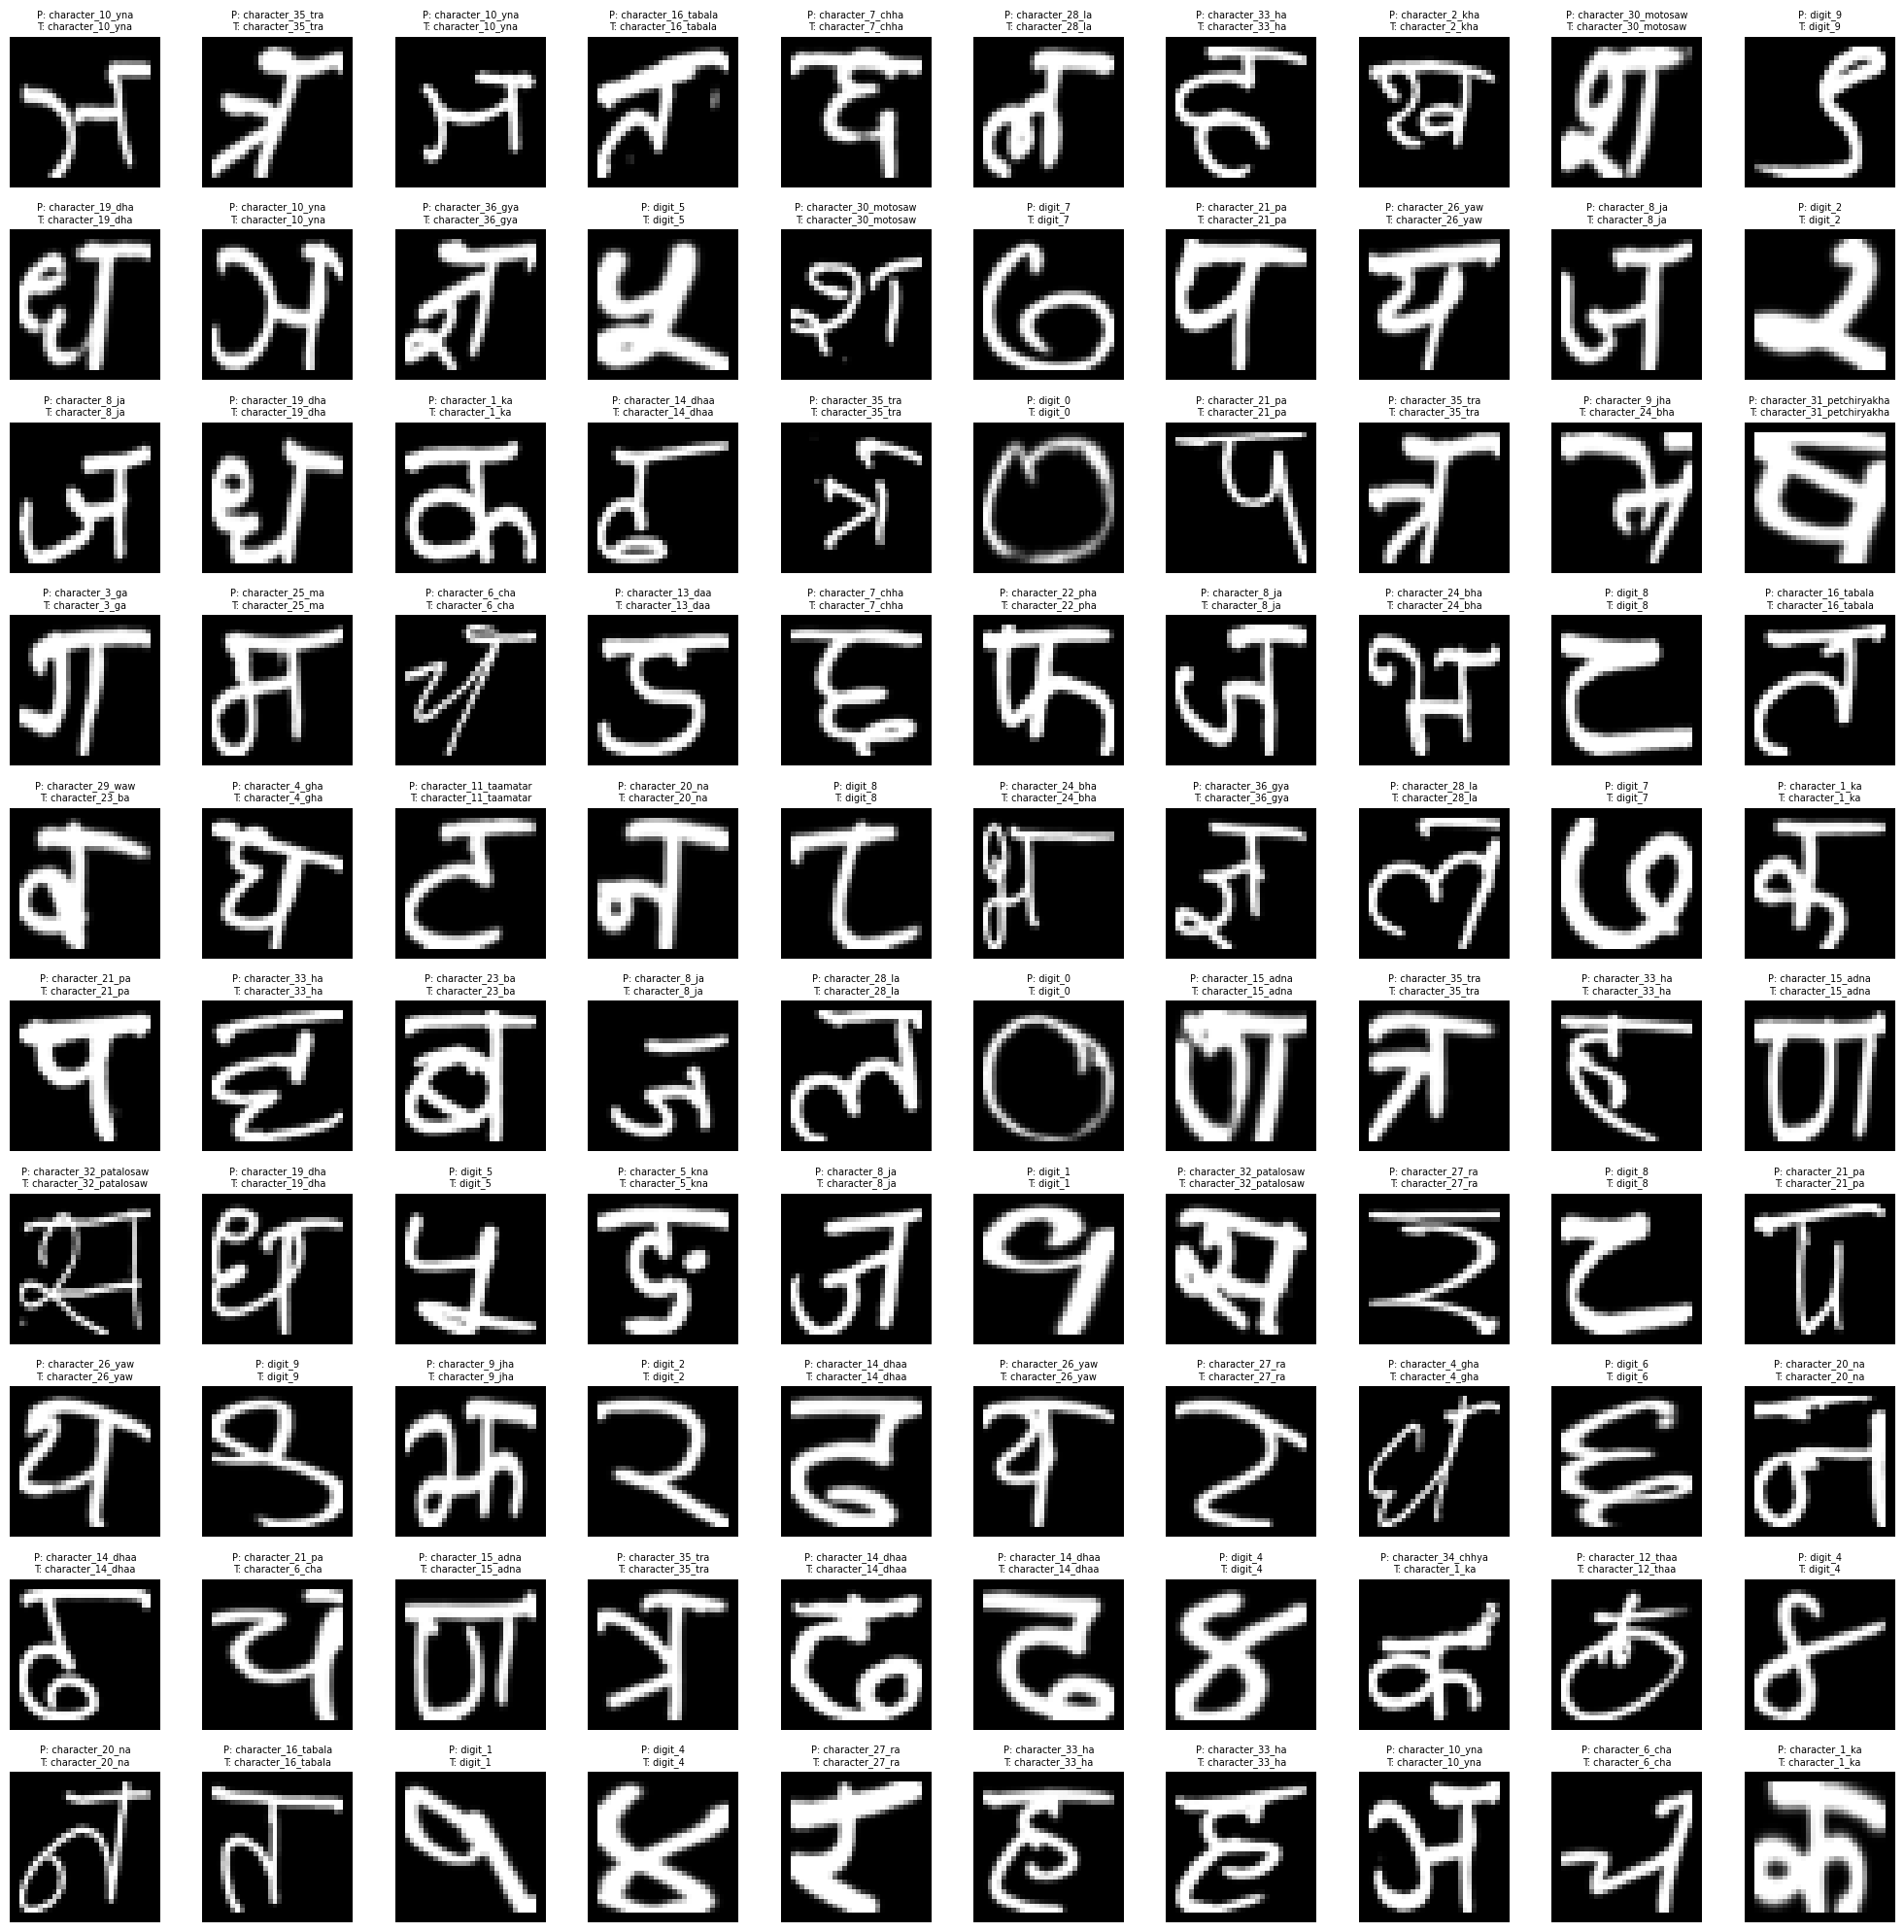

In [60]:
num_images = 100  
rows, cols = 10, 10  


predictions = model.predict(X_val[:num_images])
predicted_classes = predictions.argmax(axis=1)
true_classes = y_val[:num_images].argmax(axis=1)


plt.figure(figsize=(20, 20))
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_val[i].reshape(32, 32), cmap='gray')
    plt.title(f"P: {label_map_rev[predicted_classes[i]]}\nT: {label_map_rev[true_classes[i]]}", fontsize=7)
    plt.axis('off')

plt.tight_layout()
plt.show()
